In [4]:
from azure.quantum import Workspace
workspace = Workspace (
   resource_id = "/subscriptions/646a7369-d450-42a2-b218-fda1b458300b/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/QuantumGO2",
   location = "westcentralus"
)


# QAOA

## Installs

In [3]:
%pip install openqaoa

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 8.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.5/633.5 kB 13.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 4.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135

In [4]:
%pip install geopandas
%pip install libpysal
%pip install contextily
%pip install fiona

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached contextily-1.3.0-py3-none-any.whl (16 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached rasterio-1.3.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21.3 MB)
  Using cached xyzservices-2023.5.0-py3-none-any.whl (56 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this direc

## Imports

In [5]:
%matplotlib inline

#some regular python libraries
import libpysal
from libpysal import weights, examples
from contextily import add_basemap
import networkx as nx
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import geopandas
import fiona

#import problem classes from OQ for easy problem creation
from openqaoa.problems import MaximumCut, NumberPartition, MinimumVertexCover, QUBO
from openqaoa.utilities import plot_graph, ground_state_hamiltonian
from openqaoa.qaoa_components import Hamiltonian

#import the QAOA workflow model
from openqaoa import QAOA

#import method to specify the device
from openqaoa.backends import create_device

## Problem

Create a random graph using the networkx module - using the MaximumCut problem class, we translate into the QUBO formalism to optimize with QAOA

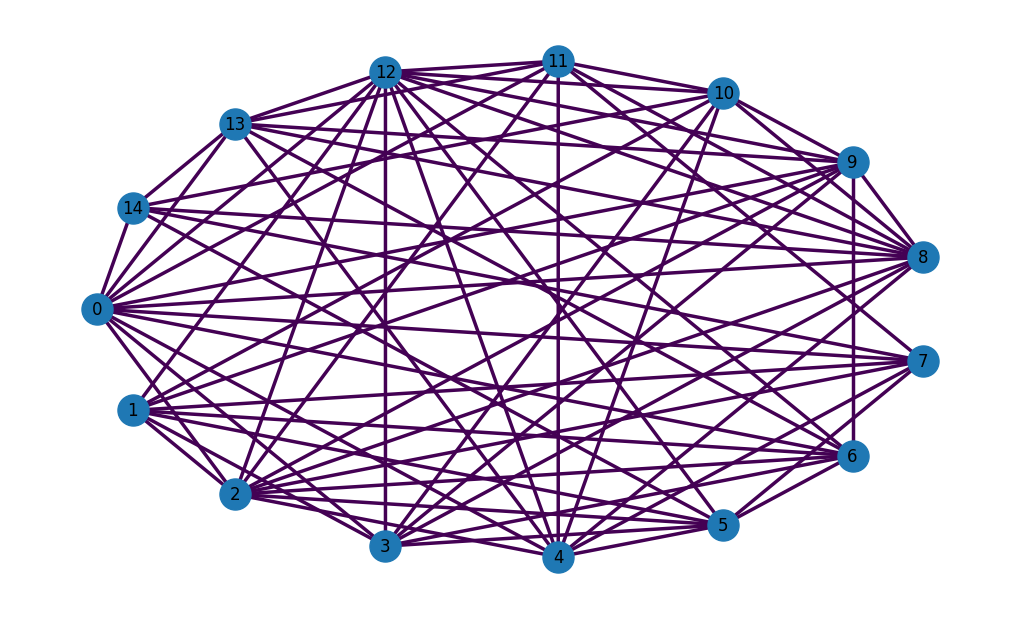

In [6]:
nodes = 15
edge_probability = 0.6
g = nx.generators.fast_gnp_random_graph(n=nodes, p=edge_probability, seed=42)
pos = nx.spring_layout(g)
plot_graph(g)

In [9]:

url_coal_mines = "https://drive.google.com/uc?export=download&id=1IRDLahuRcxAqst2vjas7FEGvBPJBtSjH"

coal_mines = geopandas.read_file(url_coal_mines)

# construct the array of coordinates for the centroid
coordinates = np.column_stack((coal_mines.geometry.x, coal_mines.geometry.y))

## The 50-meter distance band graph will connect all pairs of points
## that are within 50 meters from one another. This means that points
## may have different numbers of neighbors.
dist = weights.DistanceBand.from_array(coordinates, threshold=50)
print(dist)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.

#dist_graph = dist.to_networkx()

# To plot with networkx, we need to merge the nodes back to
# their positions in order to plot in networkx

#positions = dict(zip(knn_graph.nodes, coordinates))

# plot with a nice basemap
#f, ax = plt.subplots(1, 1, figsize=(8, 4))



#for i, facet in enumerate(ax):
    #cases.plot(marker=".", color="orangered", ax=facet)
    #add_basemap(facet)
    #facet.set_title(("50-meter Distance Band")[i])
    #facet.axis("off")
#nx.draw(dist_graph, coordinates, ax=ax[0], node_size=5, node_color="b")
#plt.show()

Hamiltonian setup

In [1]:
mini_cov = MinimumVertexCover(g, field = 1., penalty = 1.) #change to something representative of MaxFlow
mini_cov_qubo = mini_cov.qubo #express Max Flow in the form of a qubo -- make substitution if not already there -- if nothing exists, research Qubos more
hamiltonian = mini_cov_qubo.hamiltonian

# import the brute-force solver to obtain exact solution
energy, configuration = ground_state_hamiltonian
an(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

NameError: name 'MinimumVertexCover' is not defined

Plot solution on graph

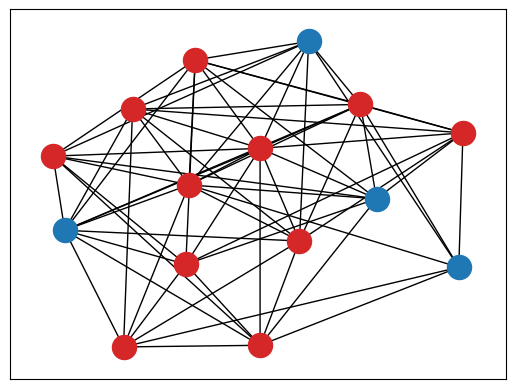

In [21]:
#plot the solution on graph
g_sol = np.copy(g)
#pos =  nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, nodelist=[idx for idx,bit in enumerate(configuration[0]) if bit == '1'], node_color="tab:red")
nx.draw_networkx_nodes(g, pos, nodelist=[idx for idx,bit in enumerate(configuration[0]) if bit == '0'], node_color="tab:blue")
nx.draw_networkx_edges(g, pos);

#add labels on the edges -- highlight quantity flowing across edge


With QAOA and vectorized statevector simulator

In [11]:
q = QAOA()
q.set_circuit_properties(mixer_hamiltonian = 'x') # the X-mixer hamiltonian, using 1-qubit interactions
#q.set_circuit_properties(mixer_hamiltonian = 'xy') # XY-mixer using 2-qubit interactions
# mixer_qubit_connectivity: ['full', 'star', 'chain']
#q.set_circuit_properties(mixer_hamiltonian = 'xy', mixer_qubit_connectivity='chain')
q.compile(mini_cov_qubo)
q.optimize()

NameError: name 'mini_cov_qubo' is not defined

## Use Custom Mixer (uncomment)

In [ ]:
# Specify a custom mixer block using the GateMap Objects
# Using manual mode
from openqaoa.qaoa_components.ansatz_constructor import RZXGateMap, RXXGateMap
from openqaoa.qaoa_components import QAOADescriptor, create_qaoa_variational_params
from openqaoa.backends import create_device
from openqaoa.optimizers import get_optimizer
from openqaoa.backends.qaoa_backend import get_qaoa_backend
from openqaoa.utilities import quick_create_mixer_for_topology

custom_mixer_block_gatemap = [RZXGateMap(0, 1), RZXGateMap(0, 2),
                              RZXGateMap(0, 3), RZXGateMap(0, 4),
                              RZXGateMap(0, 5), RXXGateMap(1, 2)]
custom_mixer_block_coeffs = [1., 1., 1., 1., 1., 1.]



# This function creates a star pattern mixer block with qubit 0 as its center
# If no coefficients are specified, the function uses default coefficients for
# all gatemaps in it
zx_gatemap_list, zx_gatemap_coeffs = quick_create_mixer_for_topology(RZXGateMap, 6, qubit_connectivity='star')
xx_gatemap_list, xx_gatemap_coeffs = quick_create_mixer_for_topology(RXXGateMap, 6, qubit_connectivity='full')

zx_gatemap_list.extend(xx_gatemap_list)
zx_gatemap_coeffs.extend(xx_gatemap_coeffs)

final_gatemap_list = zx_gatemap_list
final_gatemap_coeffs = zx_gatemap_coeffs



#qaoa_descriptor = QAOADescriptor(mini_cov_qubo.hamiltonian,
#                                   custom_mixer_block_gatemap, p=1,
#                                   mixer_coeffs=custom_mixer_block_coeffs)
qaoa_descriptor = QAOADescriptor(mini_cov_qubo.hamiltonian,
                                   final_gatemap_list, p=1,
                                   mixer_coeffs=final_gatemap_coeffs)


#device_local = create_device(location='local', name='qiskit.shot_simulator')
device_local = create_device(location='local', name='vectorized')
variate_params = create_qaoa_variational_params(qaoa_descriptor, 'standard', 'rand')
backend_local = get_qaoa_backend(qaoa_descriptor, device_local, n_shots=500)

# classical optimizer
optimizer = get_optimizer(backend_local, variate_params, {'method': 'cobyla',
                                                          'maxiter': 100})
optimizer.optimize()
q = optimizer.qaoa_result

In [10]:
q.result.most_probable_states

{'solutions_bitstrings': ['011110', '110011'], 'bitstring_energy': 4.0}

In [11]:
configuration = q.result.most_probable_states['solutions_bitstrings']

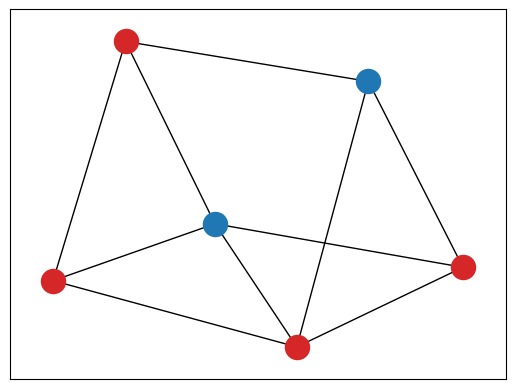

In [12]:
# Plotting the Vectorized Backend Solution
g_sol = np.copy(g)
pos =  nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, nodelist=[idx for idx,bit in enumerate(configuration[0]) if bit == '1'], node_color="tab:red")
nx.draw_networkx_nodes(g, pos, nodelist=[idx for idx,bit in enumerate(configuration[0]) if bit == '0'], node_color="tab:blue")
nx.draw_networkx_edges(g, pos);

## Device Setup

On AWS

In [10]:
# optionally configure the following properties of the model
# device

device_name = 'arn:aws:braket:::device/quantum-simulator/amazon/sv1'
braket_device = create_device(location='aws', name=device_name)
q.set_device(braket_device)

# circuit properties
q.set_circuit_properties(p=2, param_type='standard', init_type='rand', mixer_hamiltonian='x')

# backend properties (already set by default)
q.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q.set_classical_optimizer(method='cobyla', maxiter=10,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

NameError: name 'q' is not defined

## Optimize (wait)

Compiling is needed since the QAOA solver has to interact with the problem to be able to create the quantum circuit.

In [ ]:
q.compile(maxcut_qubo)

The code below can take several minutes to terminate.

In [ ]:
q.optimize()

## Get Results

In [ ]:
opt_results = q.result

In [ ]:
opt_results.optimized
# angles = the optimized gamma and beta

In [ ]:
# print the cost history
opt_results.plot_cost()

# prints a large output (commented by default)
# pprint(opt_results.intermediate)

In [ ]:
pprint(opt_results.optimized)

In [ ]:
variational_params = q.optimizer.variational_params

In [ ]:
#create the optimized QAOA circuit for qiskit backend
optimized_angles = opt_results.optimized['angles']
variational_params.update_from_raw(optimized_angles)
optimized_circuit = q.backend.qaoa_circuit(variational_params)

#print the optimized QAOA circuit for qiskit backend
optimized_circuit.diagram()